## Read advertising.csv

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import norm,ttest_ind,t
%matplotlib inline

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/advertising.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Comparing Proportions (CI - Hypothesis Test)
### Check for significance difference between Male and Female in Click on Ad.
### Find the CI for this difference.
### Define and write your null and alternate hypothesis.
### Write your conclusion (Reject/not reject null hypothesis) and explain what does it mean (there is significance difference or not).
### Solve using the calculation steps and confirm using "scipy.stats.ttest_ind()"

In [7]:
df['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

0    519
1    481
Name: Male, dtype: int64

In [8]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

0    500
1    500
Name: Clicked on Ad, dtype: int64

<Axes: xlabel='Clicked on Ad', ylabel='count'>

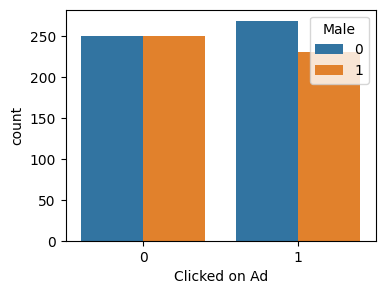

In [9]:
plt.figure(figsize=(4, 3))
sns.countplot(x=df['Clicked on Ad'],hue=df['Male'])

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

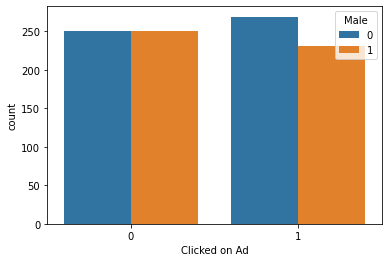

<Axes: xlabel='Male', ylabel='Clicked on Ad'>

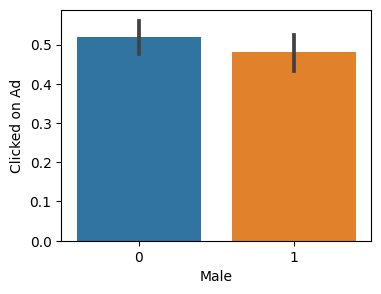

In [10]:
plt.figure(figsize=(4, 3))
sns.barplot(x=df['Male'],y=df['Clicked on Ad'])

<AxesSubplot:xlabel='Male', ylabel='Clicked on Ad'>

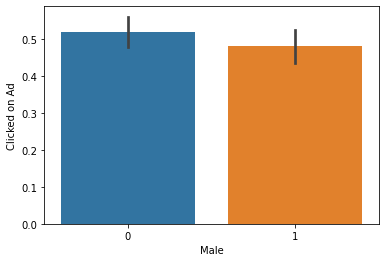

In [11]:
data = df.groupby('Male').apply(lambda x: x['Clicked on Ad'].count())
data = pd.DataFrame(data)
data.rename(columns={0:'Clicked on Ad'},inplace=True)
data

,Clicked on Ad
Male,
0,519
1,481


,Clicked on Ad
Male,
0,519
1,481


In [12]:
data1 = data['Clicked on Ad']/data['Clicked on Ad'].sum()
data1

Male
0    0.519
1    0.481
Name: Clicked on Ad, dtype: float64

,Clicked on Ad
Male,
0,0.518304
1,0.480249


In [13]:
CL=0.95
zscore = norm.ppf(0.5 + CL/2)
p1 = data1.iloc[0]
p2=data1.iloc[1]
p_diff = p1-p2
print('Difference in proportion: '+ str(p1-p2))
std_err1 = (p1*(1-p1))/int(data.iloc[0])
std_err2 = (p2*(1-p2))/int(data.iloc[1])
print('95% CI: [' +str(p_diff-zscore*np.sqrt(std_err1+std_err2)) +','+ str(p_diff+zscore*np.sqrt(std_err1+std_err2)) + ']')

Difference in proportion: 0.038000000000000034
95% CI: [-0.02397950323045612,0.09997950323045618]


In [ ]:
## CI+


Difference in proportion: 0.0383
95% CI: [-0.02367968847313774, 0.10027968847313774]


In [14]:
#Null hypothesis there is no differences mdiff = zero
#Alternative hypothesis thre is a difference  mdiff != zero
z_stat = p_diff / np.sqrt(std_err1 + std_err2)
print('z_score: '+ str(z_stat))
p_value = 2*(1-norm.cdf(np.abs(z_stat)))
print('p_value: '+str(p_value))
print('p_value: 0.229 > alpha:0.05 we fail to reject the null hypotheis')

z_score: 1.2016655108639853
p_value: 0.2294931487325833
p_value: 0.229 > alpha:0.05 we fail to reject the null hypotheis


In [ ]:
## Using Calculation steps


z_score: 1.211170979546546
p_value: 0.2258298825298657


## Comparing Means (CI - Hypothesis Test)
### Check for significance difference between Male and Female in Click on Ad.
### Find the CI for this difference.
### Define and write your null and alternate hypothesis.
### Write your conclusion (Reject/not reject null hypothesis) and explain what does it mean (there is significance difference or not).
### Solve using the calculation steps and confirm using "scipy.stats.ttest_ind()"

In [136]:
counts = df['Male'].value_counts()
counts

0    519
1    481
Name: Male, dtype: int64

0    519
1    481
Name: Male, dtype: int64

<Axes: xlabel='Male', ylabel='Daily Time Spent on Site'>

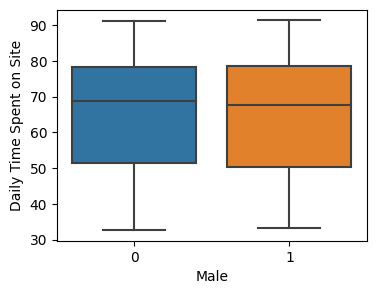

In [137]:
plt.figure(figsize=(4, 3))
sns.boxplot(x = df['Male'], y = df['Daily Time Spent on Site'])

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

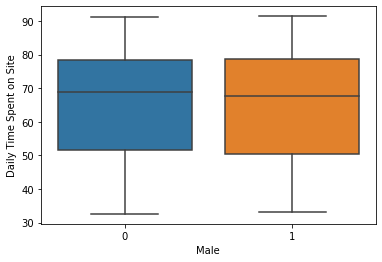

<Axes: xlabel='Male', ylabel='Daily Time Spent on Site'>

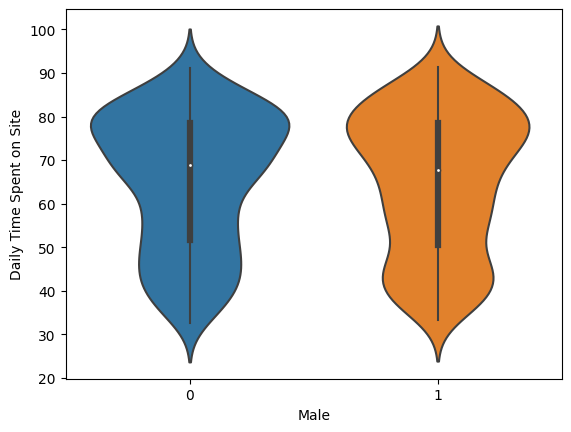

In [138]:
sns.violinplot(x=df['Male'], y=df['Daily Time Spent on Site'], data=df)

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

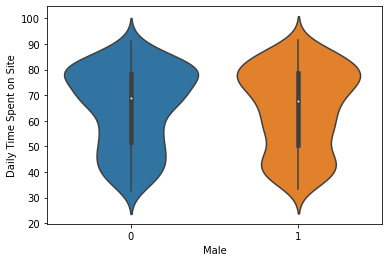

In [139]:
sum = df['Daily Time Spent on Site'].sum()

In [140]:
counts

0    519
1    481
Name: Male, dtype: int64

<Axes: xlabel='Male', ylabel='Daily Time Spent on Site'>

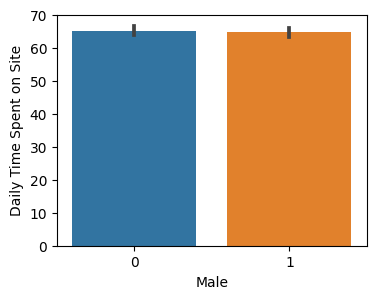

In [141]:
plt.figure(figsize=(4, 3))
sns.barplot(data = df , x= df['Male'],y=df['Daily Time Spent on Site'])

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

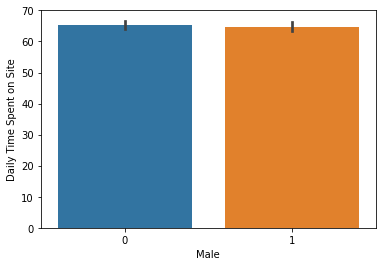

In [142]:
means = df.groupby('Male')['Daily Time Spent on Site'].mean()
means = pd.DataFrame(means)

In [143]:
means

,Daily Time Spent on Site
Male,
0,65.289287
1,64.688274


,Daily Time Spent on Site
Male,
0,65.289287
1,64.688274


In [144]:
vars = df.groupby('Male')['Daily Time Spent on Site'].var()
vars = pd.DataFrame(vars)

In [105]:
vars

,Daily Time Spent on Site
Male,
0,244.079374
1,259.505142


In [145]:
std = df.groupby('Male')['Daily Time Spent on Site'].std()
std = pd.DataFrame(std)

In [107]:
std

,Daily Time Spent on Site
Male,
0,15.623040
1,16.109163


,Daily Time Spent on Site
Male,
0,15.623040
1,16.109163


In [146]:
from scipy.stats import t
CI = 0.95
t_score = t.ppf(0.5 + CI / 2, df=len(df)-2)
dif = float(means.iloc[0]-means.iloc[1])
print('difference in mean: '+str(dif))
std1 = std.iloc[0]
n1 = counts.values[0]
std2 = std.iloc[1]
n2 = counts.values[1]
margin = t_score*np.sqrt((std1**2)/n1+(std2**2)/n2)
lower = dif - margin
upper = dif + margin
print('95% CI: ['+str(float(lower))+','+str(float(upper))+']')

difference in mean: 0.6010126622843472
95% CI: [-1.3709227781465716,2.572948102715266]


In [ ]:
## CI

Difference in mean: 0.6010129999999947
95% CI: [-1.3709224295437132, 2.5729484295437026]


In [147]:
t_stat = float(dif/np.sqrt((std1**2)/n1+(std2**2)/n2))
print('t_score: '+str(t_stat))
p_value = (1 - t.cdf(t_stat,df=n1+n2-2))*2
print('p_value: '+str(p_value))
print('p_value > alpha so i fail to reject the null hypothesis')

t_score: 0.5980893061458729
p_value: 0.5499160431131815
p_value > alpha so i fail to reject the null hypothesis


In [ ]:
## Using Calculation steps


t_score: 0.5980896455209542
p_value: 0.5499158167679443


In [149]:
import scipy.stats as stats
male = df[df['Male']==0]
female = df[df['Male']==1]
t_statistic, p_value = stats.ttest_ind(male['Daily Time Spent on Site'],female['Daily Time Spent on Site'] )

In [150]:
print(t_statistic)
print(p_value)

0.5987865950462051
0.5494510852945214


In [ ]:
## Using scipy.stats.ttest_ind()


Ttest_indResult(statistic=0.5987865950462051, pvalue=0.5494510852945214)

## Paired t-test
### Check for significant difference in Daily Time Spent on Site in April and May.
### Solve using the calculation steps and confirm using "scipy.stats.ttest_rel()"
### Write your conclusion.
##### Hint: In this exercise we suppose we compare the Daily Time Spent on Site in April and May for the same people. That is why we selected April and May because it has the same value counts.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [16]:
df['date'] = pd.to_datetime(df['Timestamp'])

In [17]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,date
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03 03:36:18


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,date
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03 03:36:18


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   object        
 9   Clicked on Ad             1000 non-null   int64         
 10  date                      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 86.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   object        
 9   Clicked on Ad             1000 non-null   int64         
 10  date                      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 86.1+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,date
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03 03:36:18


In [20]:
df['Month'] = df['date'].dt.month
counts = df['Month'].value_counts()
counts

2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: Month, dtype: int64

2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: month, dtype: int64

In [40]:
april = np.array(df[df['Month'] == 4]['Daily Time Spent on Site'])
may = np.array(df[df['Month'] == 5]['Daily Time Spent on Site'])


In [43]:
diff = may - april
diff

array([-20.24,   8.54,   2.51, -28.71,  -5.63, -11.83,  -2.46,  15.7 ,
        -6.19, -39.97,   2.13,  28.48, -32.91, -21.64,  31.44,   5.93,
        17.25,  29.49,   1.26,  -4.02,  23.39,  28.96,  -4.76,  -2.36,
         1.43,  35.97, -12.85,   3.25, -50.41,  -7.12,   9.59, -28.68,
       -12.38,  16.97,   7.41, -11.79,   0.71,   9.56,   4.49,   2.71,
         0.56,   3.1 , -18.75,   8.32, -14.91,   1.  , -40.37,   6.43,
        -8.53,  18.03,   7.9 ,  45.27, -23.22, -12.22,  45.95,  10.61,
         7.54,   2.98,   7.94,  11.27,  25.72,   8.75, -52.33, -40.12,
        -5.64,  -9.05, -33.36,   3.45, -36.78,   9.72,  10.21, -40.74,
         7.66,  -0.49,  13.09, -47.67,  26.37, -12.59,  -1.89,  11.74,
       -24.04,  10.9 ,  17.44, -11.76,  11.94,  -4.49,   1.41, -34.16,
        -3.19, -13.99,  -8.04, -24.73,  -1.25,  -6.7 ,  27.13,  21.82,
       -35.81, -12.99, -27.23,  38.73,  -2.85,  27.04,  -6.33,  -1.19,
       -33.66,   8.56,   2.89, -31.02,   9.7 , -28.77,  10.95,   1.64,
      

,month,Daily Time Spent on Site
0,3,68.95
1,4,80.23
2,3,69.47
3,1,74.15
4,6,68.37


In [63]:

mean = diff.mean()
n = len(may)
s = diff.std()
se = s/np.sqrt(n)
t_stat = mean/se
p_value = 2*(1 - t.cdf(np.abs(t_stat),df = n-1))
print('mean of diffs: '+ str(mean))
print('S.E: ' + str(se))
print('t_score: '+ str(t_stat))
print('p_value: '+ str(p_value))
print('I fail to reject the null hypothesis')

mean of diffs: -1.613537414965986
S.E: 1.7750066604301626
t_score: -0.9090317523512585
p_value: 0.3648315150186776


In [ ]:
# Using Steps


mean of diffs.: -1.613537414965986
S.E: 1.7810750769712742
t_score: -0.9059345312437999
p_value: 0.36646315120526873


In [64]:
# using ttest_rel
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(april, may)
print(str(t_stat) + str(p_value))

0.90593453124380.36646315120526884


In [ ]:
# using ttest_rel

Ttest_relResult(statistic=-0.9059345312438, pvalue=0.36646315120526884)

## Chi-Squared Distribution    (Optional Exercise)
### Draw 10 different random sample of size = 1000 from standard normal distribution.
### Derive a Chi-square distribution of k=1,2,....10 using these samples.
### Plot your results.
### Compare with the one from scipy.stats.chi2()
### You can also compare with the one from np.random.chisquare()

## Chi-square goodness of fit
### Create a new column that contain the month.
### Check if all existing months are equally distributed.
### Confirm using from scipy.stats.chisquare()

In [67]:
count = df['Month'].value_counts()

In [70]:
total = len(df['Month'])

In [71]:
expected_counts = pd.Series(index=count.index, data= total / len(count))
expected_counts

2    142.857143
3    142.857143
4    142.857143
1    142.857143
5    142.857143
6    142.857143
7    142.857143
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   object        
 9   Clicked on Ad             1000 non-null   int64         
 10  date                      1000 non-null   datetime64[ns]
 11  month                     1000 non-null   int64         
dtypes: datetime64[ns](1),

2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: month, dtype: int64

<Axes: >

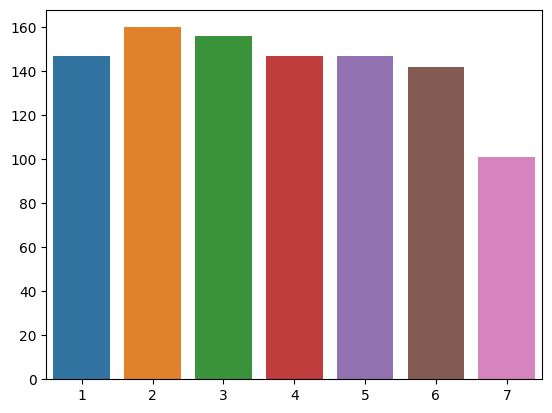

In [72]:
sns.barplot(x = count.index , y = count.values)

<AxesSubplot:xlabel='month', ylabel='count'>

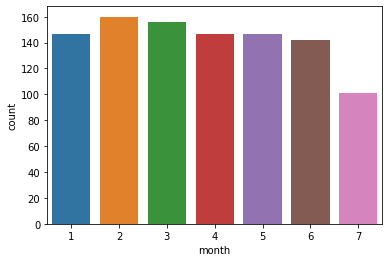

In [ ]:
from scipy.stats import chi2
chi2_stat = np.sum((count - expected_counts)**2 / expected_counts)
dof = len(count)-1
p_value = 1 - chi2.cdf(chi2_stat, dof)
print(chi2_stat)
print(p_value)
print('p_value<apha so i reject the null hypothesis' )

15.896
0.01432319742349919


In [ ]:
# using steps


Chi_Square_Score: 15.896
p-value: 0.01432319742349919


In [78]:
# using chisquare
from scipy.stats import chisquare
chi2_stat, p_value = chisquare(f_obs=count, f_exp=expected_counts)
print(chi2_stat)
print(p_value)

15.896
0.01432319742349924


In [ ]:
# using chisquare

Chi_Square_Score: 15.896
p-value: 0.01432319742349924


## Chi-square test of independence
### Check if there is a significant relation between "Clicked on Ad" and "month".
### Use from scipy.stats.chi2_contingency() only.
### Write your conclusion

<Axes: xlabel='Clicked on Ad', ylabel='count'>

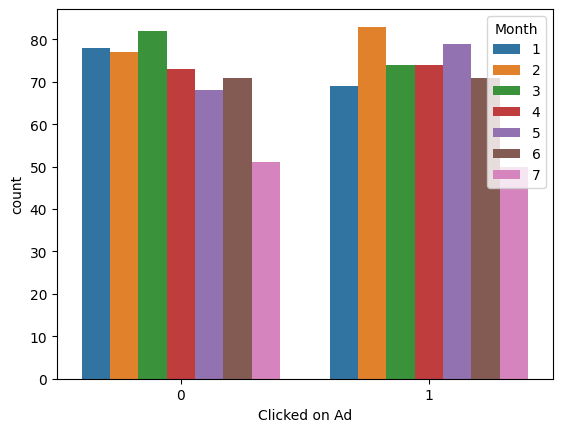

In [79]:
sns.countplot(x= df['Clicked on Ad'],hue = df['Month'])

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

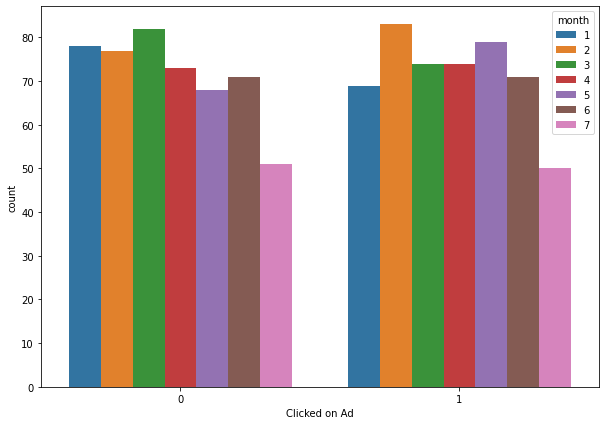

<Axes: xlabel='Month', ylabel='Clicked on Ad'>

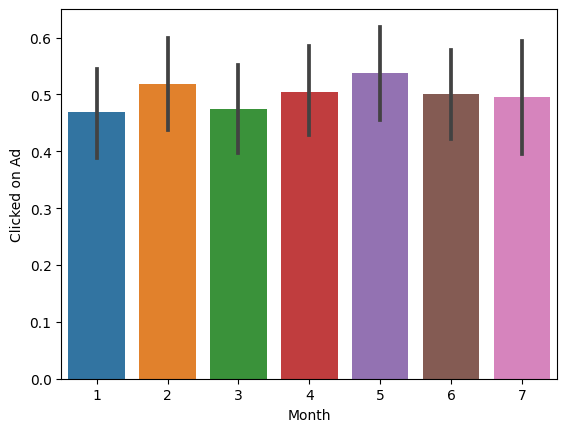

In [80]:
sns.barplot(data = df , x = df['Month'],y=df['Clicked on Ad'])

<AxesSubplot:xlabel='month', ylabel='Clicked on Ad'>

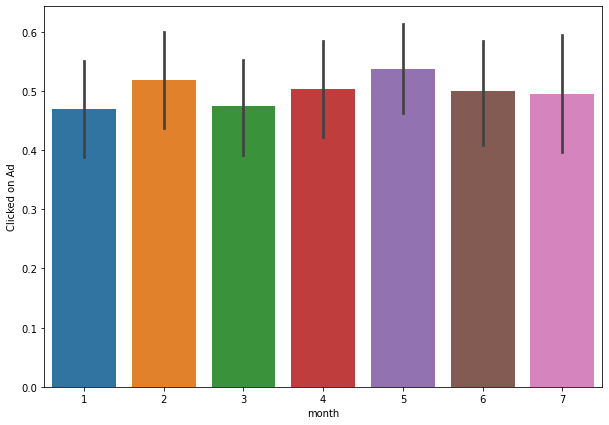

In [87]:
pivot_table = df.pivot_table(index=df['Month'], columns=df['Clicked on Ad'], aggfunc='size', fill_value=0).reset_index()
pivot_table

Clicked on Ad,Month,0,1
0,1,78,69
1,2,77,83
2,3,82,74
3,4,73,74
4,5,68,79
5,6,71,71
6,7,51,50


Clicked on Ad,0,1
month,,
1,78,69
2,77,83
3,82,74
4,73,74
5,68,79
6,71,71
7,51,50


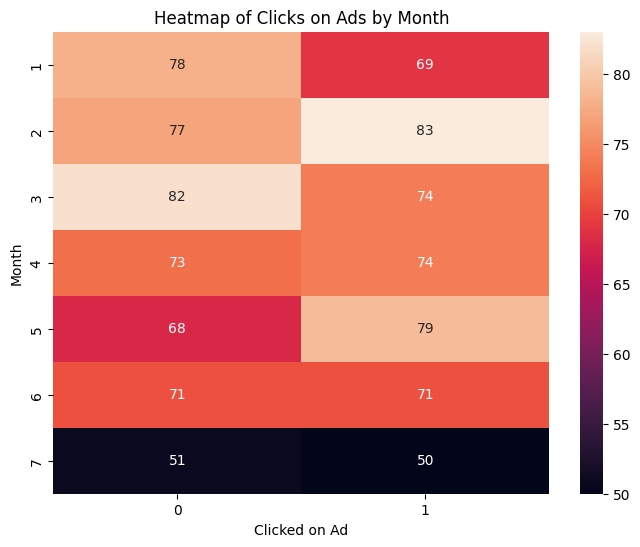

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table.set_index('Month'), annot=True)
plt.title('Heatmap of Clicks on Ads by Month')
plt.show()

<AxesSubplot:xlabel='Clicked on Ad', ylabel='month'>

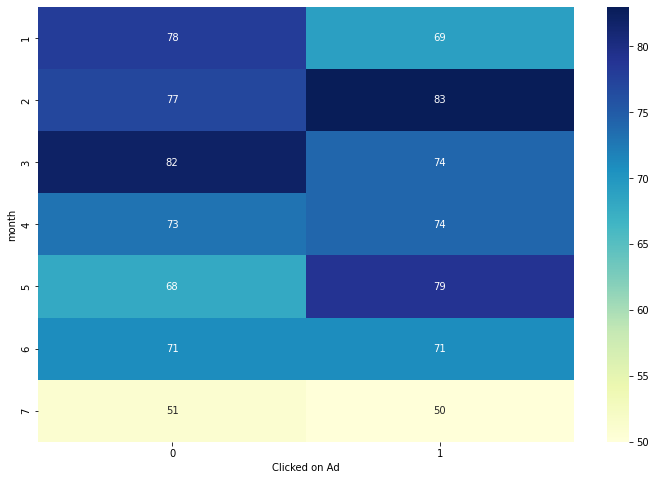

In [94]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Month'], df['Clicked on Ad'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(expected)
print(chi2_stat)
print(p_value)
print(dof)

[[73.5 73.5]
 [80.  80. ]
 [78.  78. ]
 [73.5 73.5]
 [73.5 73.5]
 [71.  71. ]
 [50.5 50.5]]
2.026109781307801
0.9172816839796131
6


Expected:
[[73.5 73.5]
 [80.  80. ]
 [78.  78. ]
 [73.5 73.5]
 [73.5 73.5]
 [71.  71. ]
 [50.5 50.5]]
Chi_Square_Score: 2.026109781307801
p-value: 0.9172816839796131
dof: 6


## F Distribution (Optional)
### Generate different F distributions from different Chai distributions using np.random.chisquare().
### Compare with scipy.stats.f()

## ANOVA
### Create a new column that identifies age groups (young,adult,old). You can use pd.cut()
### Check if the age group affects the Daily Time Spent on Site.
### Use only scipy.stats.f_oneway()
### Write your conclusion.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   object        
 9   Clicked on Ad             1000 non-null   int64         
 10  date                      1000 non-null   datetime64[ns]
 11  Month                     1000 non-null   int64         
dtypes: datetime64[ns](1),

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   object        
 9   Clicked on Ad             1000 non-null   int64         
 10  date                      1000 non-null   datetime64[ns]
 11  month                     1000 non-null   int64         
dtypes: datetime64[ns](1),

<Axes: xlabel='Daily Time Spent on Site', ylabel='Count'>

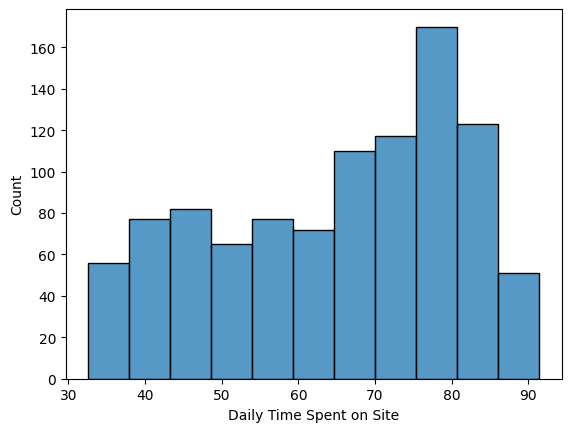

In [96]:
sns.histplot(data = df['Daily Time Spent on Site'])

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Count'>

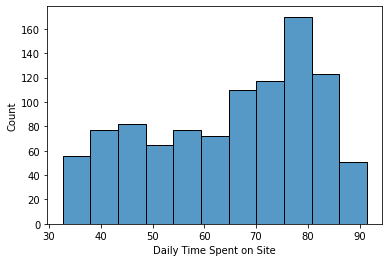

<Axes: xlabel='Age', ylabel='Count'>

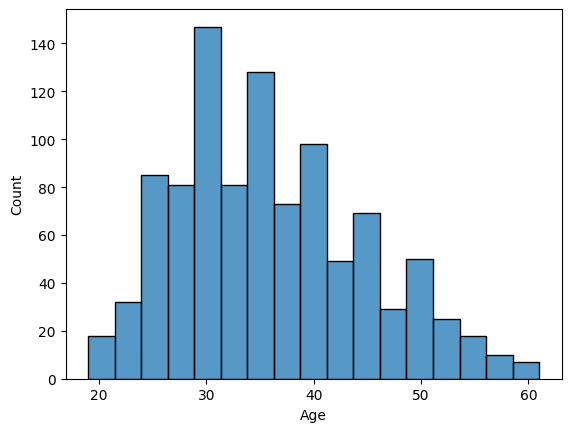

In [97]:
sns.histplot(data = df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

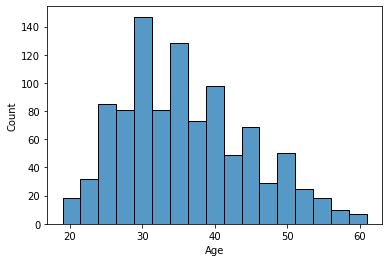

<Axes: xlabel='Age', ylabel='count'>

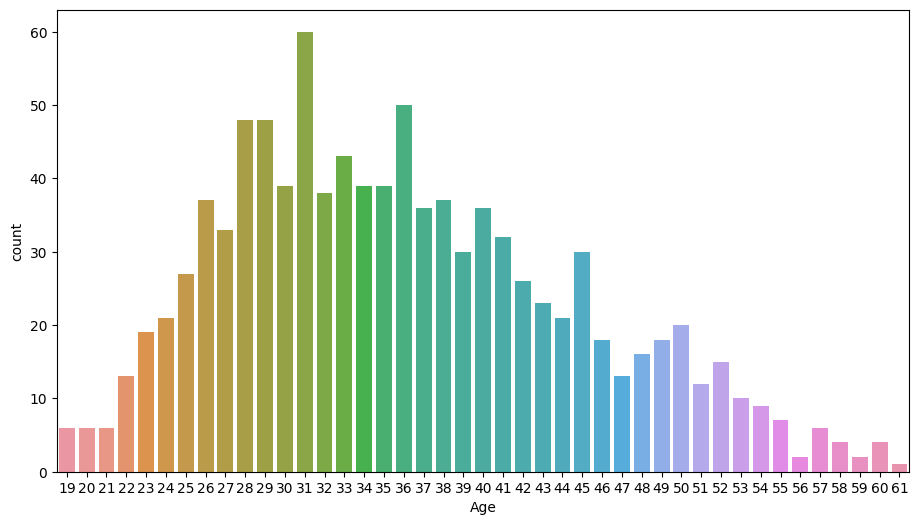

In [103]:
plt.figure(figsize=(11, 6))

sns.countplot(x=df['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

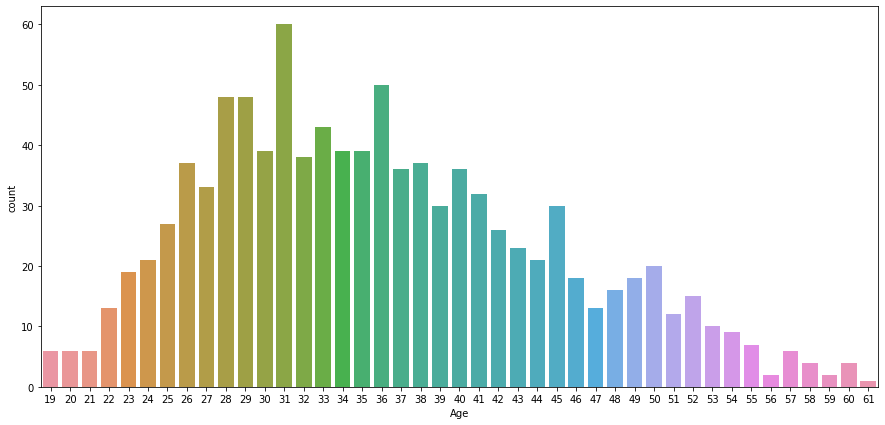

In [106]:
count = df['Age'].value_counts()
count

31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64

31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64

In [111]:
labels = ['Adult','Young','Old']

In [112]:
df['Group'] = pd.cut(df['Age'], bins = 3, labels = labels, right=False)

In [113]:
count = df['Group'].value_counts()
count

Young    460
Adult    401
Old      139
Name: Group, dtype: int64

Young    444
Adult    430
Old      126
Name: AgeGroups, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   object        
 9   Clicked on Ad             1000 non-null   int64         
 10  date                      1000 non-null   datetime64[ns]
 11  month                     1000 non-null   int64         
 12  AgeGroups            

<Axes: xlabel='Group', ylabel='Age'>

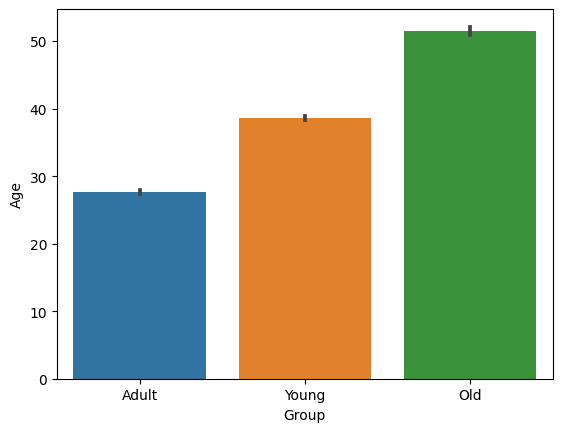

In [115]:
sns.barplot(x = df['Group'],y=df['Age'])

<AxesSubplot:xlabel='AgeGroups', ylabel='Age'>

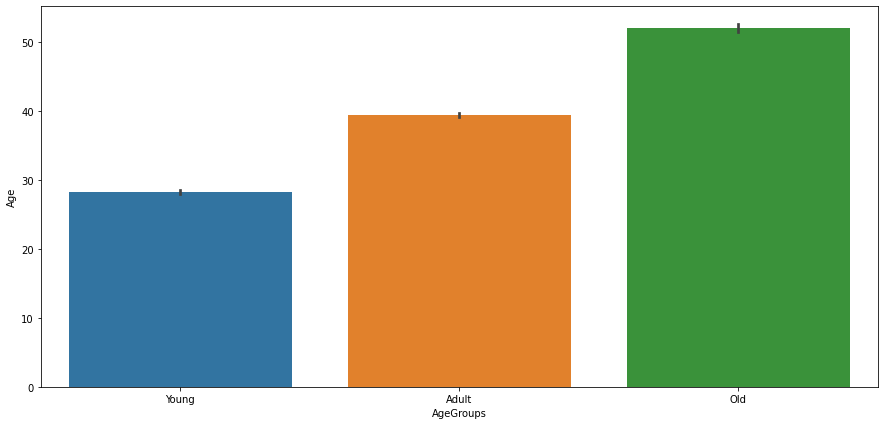

<Axes: xlabel='Group', ylabel='count'>

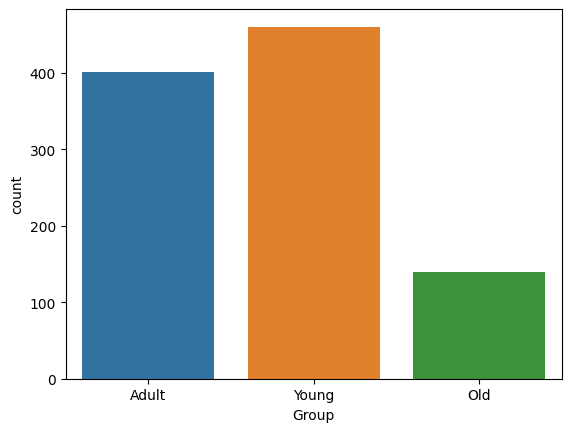

In [118]:
sns.countplot(x = df['Group'])

<AxesSubplot:xlabel='AgeGroups', ylabel='count'>

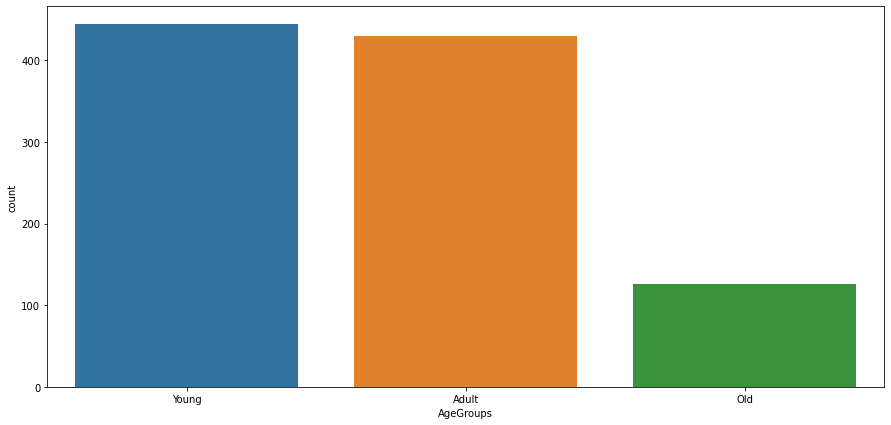

<Axes: xlabel='Group', ylabel='Daily Time Spent on Site'>

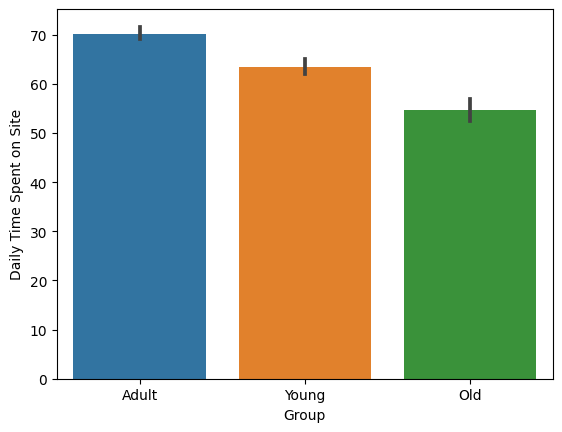

In [119]:
sns.barplot(x= df['Group'],y=df['Daily Time Spent on Site'])

<AxesSubplot:xlabel='AgeGroups', ylabel='Daily Time Spent on Site'>

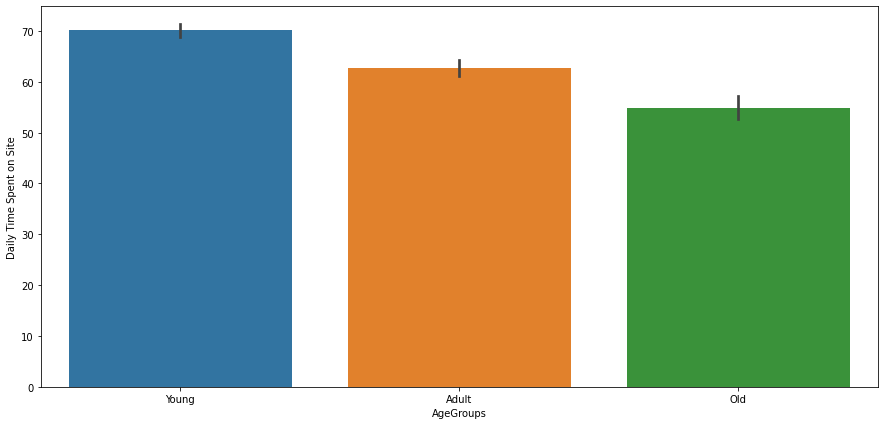

<Axes: xlabel='Group', ylabel='Daily Time Spent on Site'>

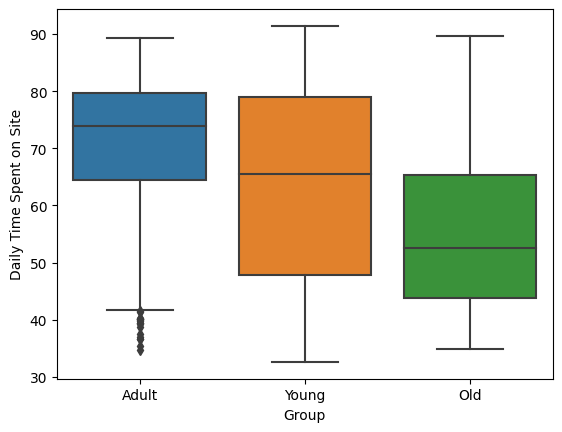

In [122]:
sns.boxplot(x=df['Group'],y = df['Daily Time Spent on Site'])

<AxesSubplot:xlabel='AgeGroups', ylabel='Daily Time Spent on Site'>

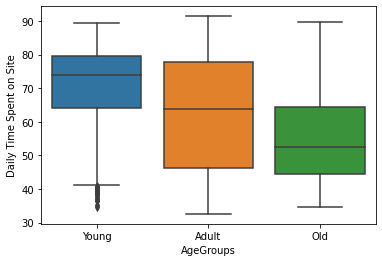

<Axes: xlabel='Group', ylabel='Daily Time Spent on Site'>

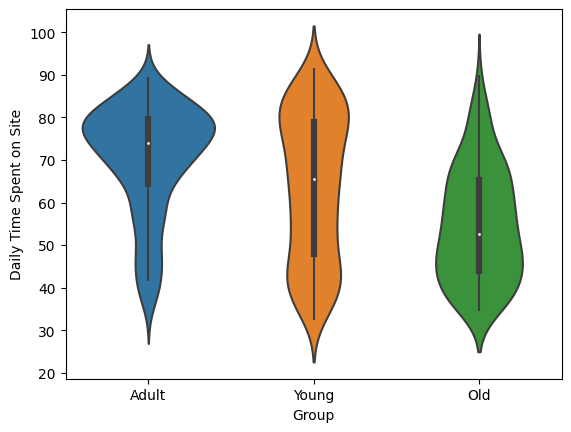

In [123]:
sns.violinplot(x=df['Group'], y=df['Daily Time Spent on Site'], data=df)

<AxesSubplot:xlabel='AgeGroups', ylabel='Daily Time Spent on Site'>

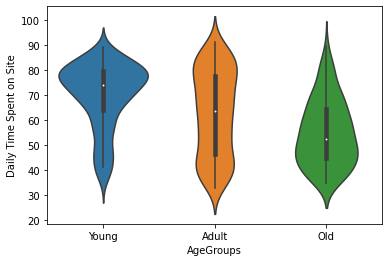

<Axes: xlabel='Group', ylabel='Daily Time Spent on Site'>

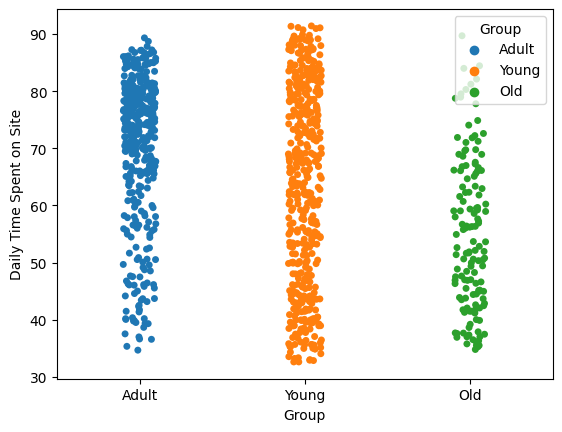

In [128]:
sns.stripplot(x=df['Group'], y=df['Daily Time Spent on Site'], data=df,hue=df['Group'])

<AxesSubplot:xlabel='AgeGroups', ylabel='Daily Time Spent on Site'>

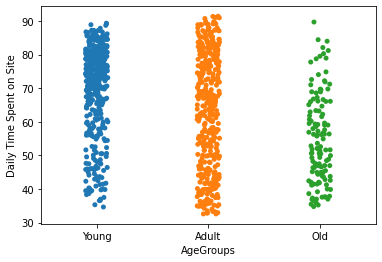

In [132]:
import scipy.stats as stats
young = df[df['Group']=='Young']
adult=df[df['Group']=='Adult']
old=df[df['Group']=='Old']
f_statistic, p_value = stats.f_oneway(young['Daily Time Spent on Site'], old['Daily Time Spent on Site'], adult['Daily Time Spent on Site'] )
print(f_statistic)
print(p_value)

59.25151607240825
4.845794511400996e-25


F-score: 59.26824116449695
p-value: 4.77389772073441e-25
